# Similar Melody Detection using Probabilistic Learning

## Problem Statement

> Two song or track X and Y will be called similar melody if both of the tracks are having common Musical Notes(a.k.a Frequency) in their Audio Wave Time series.

## Tasks

1. **Data Set Discovery** : It's a process of crawling/sourcing RAW Data for Data Mining and applying Probabilistic Learning. Raw Data is in a list of mp3 pairs where each pair contains `(original song, cover song)`


2. **Exploratory Data Analysis (E.D.A) :** It's the process of extracting or summarizing meaningful insights from Data through Statistical Analysis & Data Visualizations


3. **Feature Engineering** : It's the process of choosing right feature vector for training any Machine Learning Model. We'll use co-relation Matrix and Plot Heat Map to see dominating areas/feature pairs


4. **ML/Probalilistic Model Selection** : It's the process of choosing correct Machine Learning Model, train with features, validate accuracy and choose the best Model/Algorithms over all. 


5. **Hypothesis Testing** : A statistical hypothesis test is a method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis


## Install/Upgrade Dependencies

In [ ]:
!pip3 install --upgrade numpy
!pip3 install --upgrade cython
!pip3 install --upgrade librosa
!pip3 install --upgrade tensorflow
!pip3 install --upgrade keras
!pip3 install --upgrade seaborn

## DataSet used

| Original Song & Cover Song Pair

In [3]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import librosa
import os

%matplotlib inline

In [13]:
DATA_DIR = f"./data/"

## Constants for DataSets
COVER_SONGS = "COVER_SONGS"

dataset_paths = {
    COVER_SONGS: f"{DATA_DIR}coversongs/covers32k/"
}


# sample_file = f"{DATA_DIR}"
# y, sr = librosa.load(filename)
# y

# filePath = lambda dataset : f"{dataset_paths[COVER_SONGS]}/{dataset}"

# songs = os.listdir(dataset_paths[COVER_SONGS] )




In [32]:
## Use any two pair of files ( Once contains Actual Song andohter contains Cover )
song_a = f"{dataset_paths[COVER_SONGS]}My_Heart_Will_Go_On/celine_dion+Au_Coer_Du_Stade+11-My_Heart_Will_Go_On.mp3" 
song_b = f"{dataset_paths[COVER_SONGS]}My_Heart_Will_Go_On/new_found_glory+From_the_Screen_to_Your_Stereo+07-My_Heart_Will_Go_On.mp3" 

song , song_sr = librosa.load(song_a)
cover, cover_sr = librosa.load(song_b)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [33]:
print(f"Song Shape : {song.shape}\n Cover Shape: {cover.shape}\n\n")
print(f"Song Sample Rate : {song_sr}\n Cover Sample Rate: {cover_sr} ")


Song Shape : (7118799,)
 Cover Shape: (4043618,)


Song Sample Rate : 22050
 Cover Sample Rate: 22050 


In [16]:
# Sample Rate
sr

22050

### Display Audio Playback Options

In [ ]:
> *Actual Song* : 

In [28]:
import IPython

# Original Song Playback
IPython.display.Audio(filename=song_a, rate=song_sr)

In [29]:
# Display Cover Song Playback
IPython.display.Audio(filename=song_b, rate=cover_sr)


### Plot Original Song Sound Wave

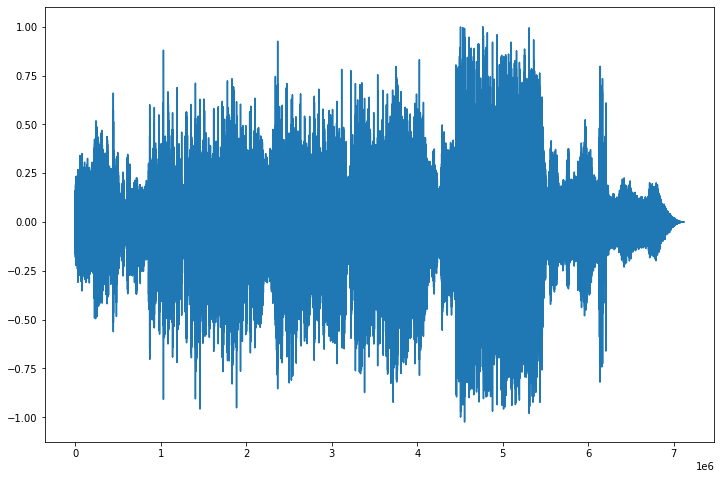

In [31]:
pt.figure(figsize=(12, 8))
pt.plot(song)


pt.show()

> Inspect More zoomed view

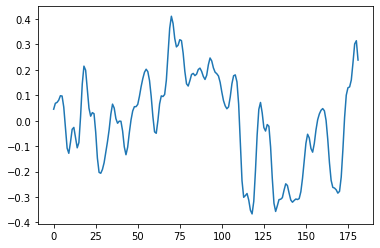

In [42]:
pt.plot(song[4041018:4041200 ])
pt.show()

### Plot Cover Song

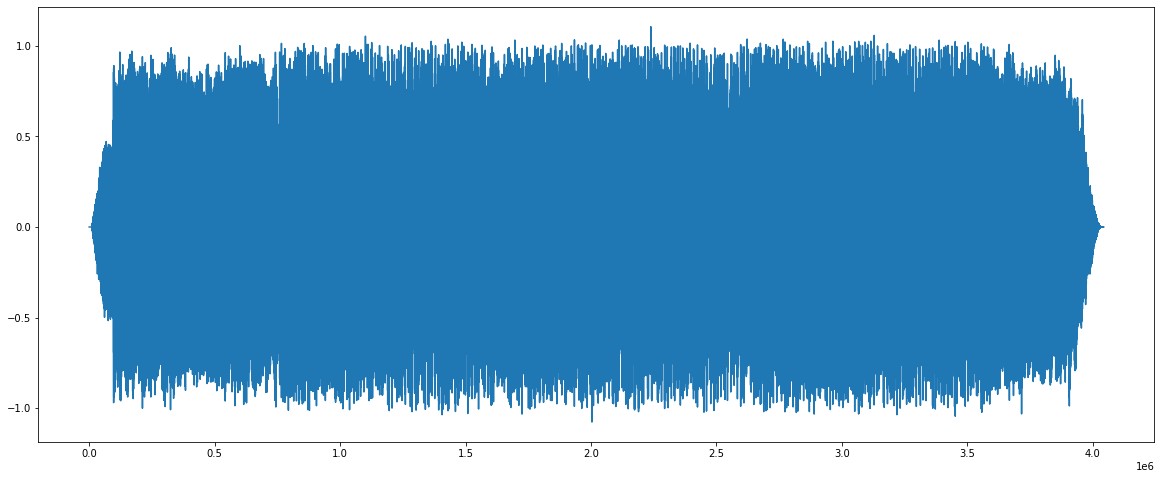

In [36]:
pt.figure(figsize=(20, 8))
pt.plot(cover)


pt.show()

> Inspect Wave in more zoomed time frame

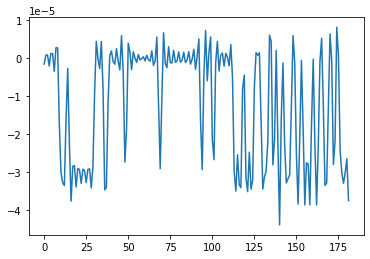

In [40]:
pt.plot(cover[4041018:4041200 ])
pt.show()

In [20]:
sr

22050

## Time Domain Audio Signal Analysis using Mel Spectogram


In [45]:
# Show Frequencies Spectogram for Original Song

mel_spectogram_song = librosa.feature.melspectrogram(y=song, sr=song_sr)

mel_spectogram_song

array([[1.1996138e-12, 1.4730556e-06, 2.6076719e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2408711e-12, 3.0637643e-06, 9.1412265e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.5777050e-13, 2.2298414e-06, 2.2646805e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9775834e-19, 1.2746767e-17, 1.4180954e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.4597808e-19, 7.4103157e-18, 1.5332839e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1863156e-19, 3.8806326e-18, 1.5567940e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

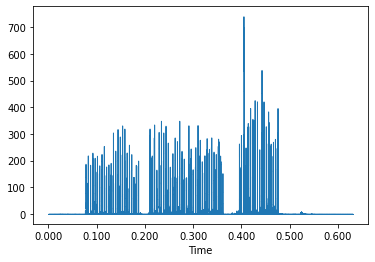

In [52]:
import seaborn as sns
## For Displaying Frequency Domain Time Series
import librosa.display

# Display Mel Spectogram for Original Song
librosa.display.waveshow(mel_spectogram_song)

In [45]:
# Show Frequencies Spectogram for Original Song

mel_spectogram_cover = librosa.feature.melspectrogram(y=song, sr=song_sr)

mel_spectogram_song

array([[1.1996138e-12, 1.4730556e-06, 2.6076719e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2408711e-12, 3.0637643e-06, 9.1412265e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.5777050e-13, 2.2298414e-06, 2.2646805e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9775834e-19, 1.2746767e-17, 1.4180954e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.4597808e-19, 7.4103157e-18, 1.5332839e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1863156e-19, 3.8806326e-18, 1.5567940e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)